<h2> Importing Libraries </h2>

In [79]:
import pandas as pd
import networkx as nx
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

<h2> Reading Data </h2>

In [25]:
# reading data
train_data=pd.read_csv('data/train.csv')
print(train_data.info())
print(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
 #   Column            Dtype
---  ------            -----
 0   source_node       int64
 1   destination_node  int64
dtypes: int64(2)
memory usage: 144.0 MB
None
   source_node  destination_node
0            1            690569
1            1            315892
2            1            189226
3            2            834328
4            2           1615927


In [15]:
#Checking missing values
print("Number of rows have missing values: ",len(train_data[train_data.isna().any(1)]))

Number of rows have missing values:  0


In [26]:
train_data.to_csv('data/train_woheader.csv',header=False,index=False)

<h2> Reading Graph using Networkx Library </h2>

In [34]:
graph=nx.read_edgelist('data/train_woheader.csv',delimiter=',',create_using=nx.DiGraph,nodetype=int)
print(nx.info(graph))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


In [38]:
train_data[0:50].to_csv('data/train_sample.csv',header=False,index=False)
subgraph=nx.read_edgelist('data/train_sample.csv',delimiter=',',create_using=nx.DiGraph,nodetype=int)

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


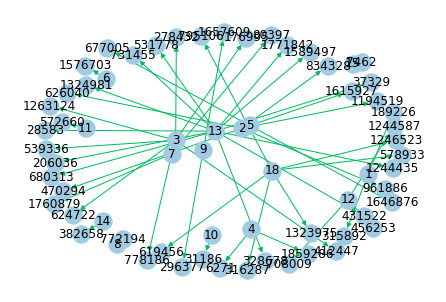

In [45]:
print(nx.info(subgraph))
pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,with_labels=True)

<h2> Basic EDA </h2>


In [48]:
print("Total number of person in social media: ",len(graph.nodes()))

Total number of person in social media:  1862220


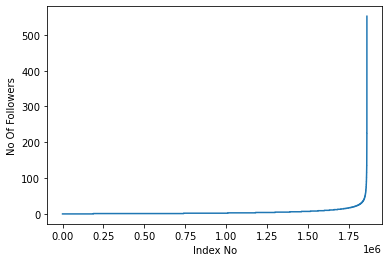

In [68]:
# Number of followers of each person
indegree_dist = list(dict(graph.in_degree()).values())
indegree_dist.sort()
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

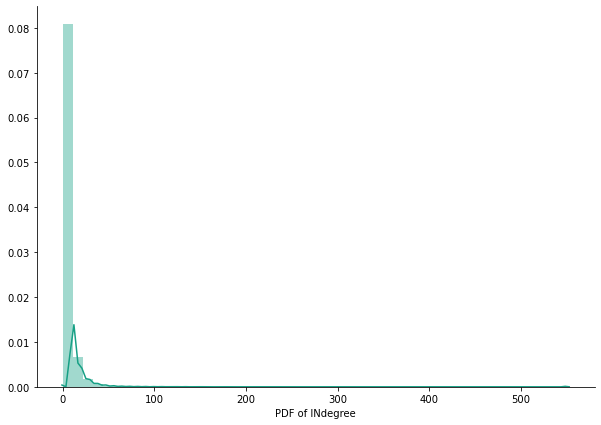

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of INdegree')
sns.despine()

In [82]:
# Finding Number of person are not followed by anyone
print("Number of person not followed by anyone: ",sum(np.array(indegree_dist)==0))

Number of person not followed by anyone:  188043


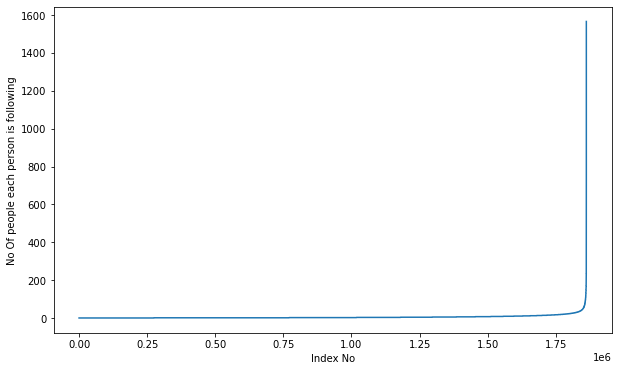

In [70]:
# Number of people each person following
outdegree_dist = list(dict(graph.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

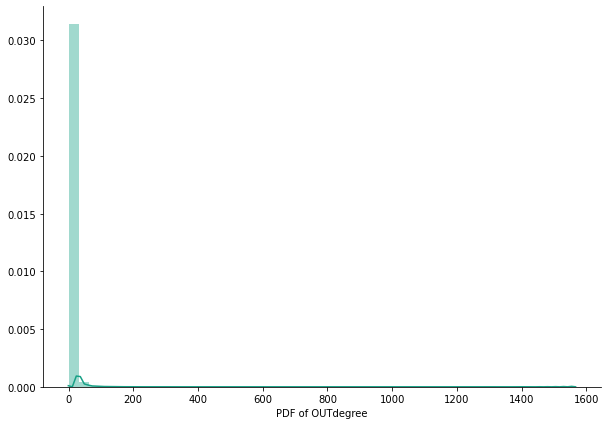

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of OUTdegree')
sns.despine()

In [83]:
# Finding Number of person are not following anyone.
print("Number of person not followed by anyone: ",sum(np.array(outdegree_dist)==0))

Number of person not followed by anyone:  274512
